# Predicting which team will win a football match

The purpose of this project is to use machine learning in order to make predictions regarding football matches. 
We have 5 .csv files, each file containing different data which might help in make predictions.

In [443]:
# importing neccesary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

## Reading data from the files

In [444]:
# Read data from .csv files 

loc = "voetbal_new/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

## Goals

In [445]:
# Method used to overwrite values found in column 'assist'
def assist(value):
    if pd.notna(value):
        return 1
    else:
        return 0

In [446]:
# function to remove duplicates 
def Duplicates(rawName , colName: str, previousName: str, newName: str ):
        if colName == "club":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
                rawName["team"].replace({previousName: newName }, inplace=True)
        elif colName == "match":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
        elif colName == "card": 
                rawName["type"].replace({previousName: newName }, inplace=True)
        else:
                print("nothing")

# function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]

In [447]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_goals_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_goals_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_goals_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_goals_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_goals_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_goals_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_goals_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

# convert the season to int 
raw_goals_file['saison'] = raw_goals_file['saison'].apply(toOneSeason)
raw_goals_file['saison'] = raw_goals_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeason = raw_goals_file[(raw_goals_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfGoals = pd.DataFrame(filterSeason)

# We use assist function for both 'assist' and 'player' colunms to count the assists and goals for each game
assistNumber = raw_goals_file['assist'].apply(assist)
goalNumber = raw_goals_file['player'].apply(assist)

dfGoals['assistNumber'] = assistNumber
dfGoals['goalNumber'] = goalNumber

# we drop the unneccesary columns 
dfGoals.drop(columns=['new_score','type','minute','round'])

,Unnamed: 0,saison,home,away,team,player,assist,assistNumber,goalNumber
50894,0,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jody Lukoki,Theo Janssen,1,1
50895,1,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jan Vertonghen,Ismaïl Aissati,1,1
50896,2,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Brett Holman,1,1
50897,3,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Maarten Martens,1,1
50898,4,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Rasmus Elm,1,1
...,...,...,...,...,...,...,...,...,...
60982,757,2022,willem-ii-tilburg,cambuur-leeuwarden,cambuur-leeuwarden,Mitchell Paulissen,NaN,0,1
60983,758,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Bryan Smeets,1,1
60984,759,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Sven Mijnans,1,1
60985,760,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Emanuel Emegha,Vito van Crooij,1,1


In [448]:
# the best player of Ajax (Assist, Goals)
filterAjaxPlayers = dfGoals[(dfGoals['team'] == "ajax-amsterdam")]
playersAssistAjax = filterAjaxPlayers.groupby('player')['assistNumber'].sum()

playersGoalsAjax = filterAjaxPlayers.groupby('player')['goalNumber'].sum()

In [449]:
# the best player of Psv (Assist, Goals)
filterPsvPlayers = dfGoals[(dfGoals['team'] == "psv-eindhoven")]
playersAssistPsv = filterPsvPlayers.groupby('player')['assistNumber'].sum()

playersGoalsPsv = filterPsvPlayers.groupby('player')['goalNumber'].sum()


Text(0, 0.5, 'Assist')

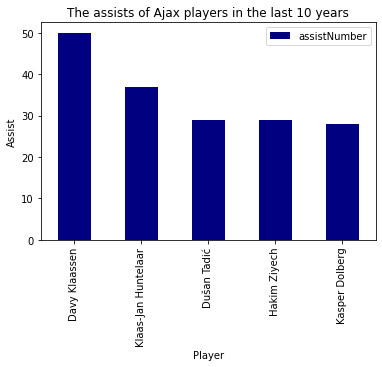

In [450]:
# plot AJAX Assist
dfAjaxAssist = pd.DataFrame(playersAssistAjax.nlargest(n=5))
ax = dfAjaxAssist.plot(lw=2, colormap='jet', title='The assists of Ajax players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")



Text(0, 0.5, 'Assist')

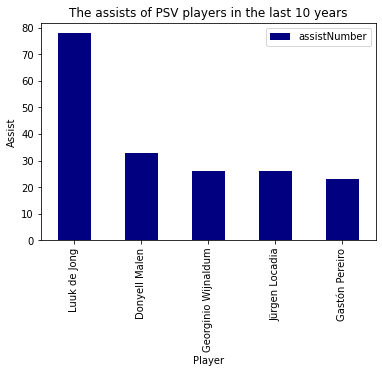

In [451]:
# plot PSV assits 
dfPsvAssist = pd.DataFrame(playersAssistPsv.nlargest(n=5))
ax = dfPsvAssist.plot(lw=2, colormap='jet', title='The assists of PSV players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")


Text(0, 0.5, 'Goals')

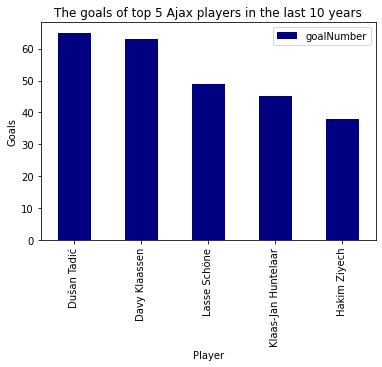

In [452]:
# plot AJAX Goals
dfAjaxGoals = pd.DataFrame(playersGoalsAjax.nlargest(n=5))
ax = dfAjaxGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

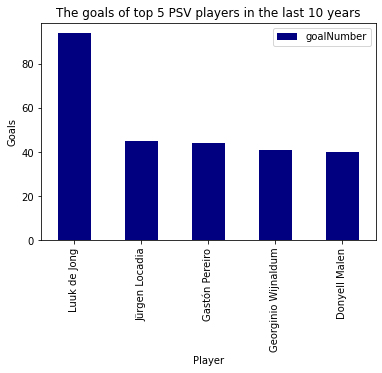

In [453]:
# plot PSV Goals
dfPsvGoals = pd.DataFrame(playersGoalsPsv.nlargest(n=5))
ax = dfPsvGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

### PSV VS Ajax (Players Goals and assists)

#### PSV Stadion

In [454]:
# The best 3 player in the Ajax - Psv Match  in psv Stadion (Ajax stats)
filterAjaxPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['home'] == "psv-eindhoven")]
playersAssistAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
playersGoalsAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['goalNumber'].sum()

In [455]:
# The best 3 player in the Ajax - Psv Match  in psv Stadium (psv stats)
filterPsvPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['away'] == "ajax-amsterdam")]
playersAssistPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
playersGoalsPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['goalNumber'].sum()

Text(0, 0.5, 'Goals')

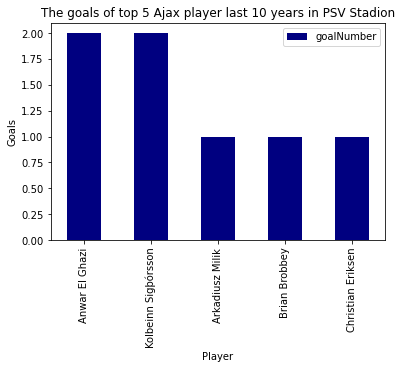

In [456]:
# plot Goals Ajax in PSV stadion
dfAjaxGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfAjaxGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

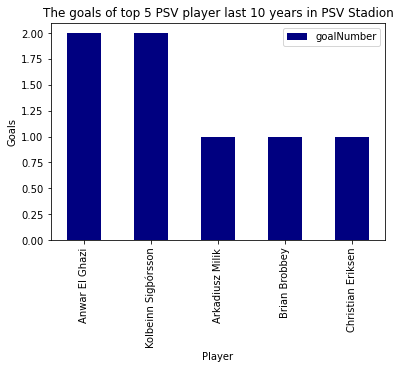

In [457]:
# plot Goals PSV in PSV stadion
dfPsvGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfPsvGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

#### Ajax Stadion

In [458]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Ajax stats)
filterAjaxPlayersInAjaxStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['away'] == "psv-eindhoven")]
playersAssistAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['assistNumber'].sum()
playersGoalsAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['goalNumber'].sum()

In [459]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Psv stats)
filterPSVplayersInAjaxStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['home'] == "ajax-amsterdam")]
playersAssistPSVInAjaxStadion = filterPSVplayersInAjaxStadion.groupby('player')['assistNumber'].sum()
playersGoalsPSVInAjaxStadion = filterPSVplayersInAjaxStadion.groupby('player')['goalNumber'].sum()

Text(0, 0.5, 'Goals')

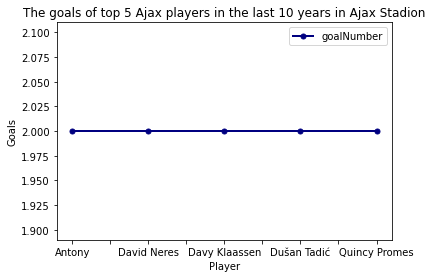

In [460]:
# plot Goals Ajax in Ajax Stadion
dfAjaxGoalsinAjaxStadion = pd.DataFrame(playersGoalsAjaxInAjaxStadion.nlargest(n=5))
ax = dfAjaxGoalsinAjaxStadion.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

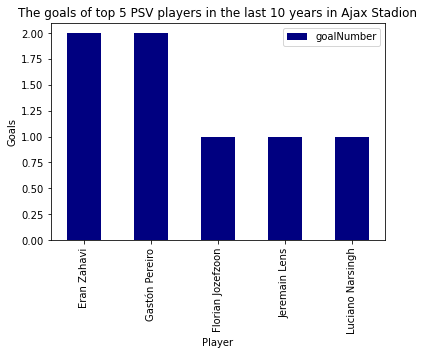

In [461]:
# plot Goals PSV in Ajax Stadion
dfPsvGoalsinAjaxStadion = pd.DataFrame(playersGoalsPSVInAjaxStadion.nlargest(n=5))
ax = dfPsvGoalsinAjaxStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

#### Home Goals and Assists

In [462]:
# Home team assist and goals
filterAssist = dfGoals[(dfGoals['assistNumber'] == 1) & (dfGoals['goalNumber'] == 1)]
groupByHomeAssist = filterAssist.groupby('home')['assistNumber'].sum()
groupByHomeGoals = dfGoals.groupby('home')['goalNumber'].sum()

#### Away Goals and Assists

In [463]:
# Away assist and goals 
groupByAwayAssist = filterAssist.groupby('away')['assistNumber'].sum()
groupByAwayGoals = filterAssist.groupby('away')['goalNumber'].sum()

## Cards

In [464]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_cards_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_cards_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_cards_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_cards_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_cards_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_cards_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_cards_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

# The cards have different names and we convert them to numbers in order to count them  geelrode kaart
Duplicates(raw_cards_file, "card", "rode kaart", "red-card")
Duplicates(raw_cards_file, "card", "rode", "red-card")
Duplicates(raw_cards_file, "card", "kaartrode", "red-card")
Duplicates(raw_cards_file, "card", "gele kaart", "yellow-card")
Duplicates(raw_cards_file, "card", "gele", "yellow-card")
Duplicates(raw_cards_file, "card", "kaartgele", "yellow-card")
Duplicates(raw_cards_file, "card", "geelrode kaart", "red-card")

# convert the season to int 
raw_cards_file['saison'] = raw_cards_file['saison'].apply(toOneSeason)
raw_cards_file['saison'] = raw_cards_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeasonCards = raw_cards_file[(raw_cards_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfCards = pd.DataFrame(filterSeasonCards)
redCard = dfCards['type']
yellowCard= dfCards['type']
dfCards['redCard_nr'] = redCard
dfCards['yellowCard_nr'] = redCard
dfCards["redCard_nr"].replace({"red-card": 1, "yellow-card": 0}, inplace=True)
dfCards["yellowCard_nr"].replace({"red-card": 0, "yellow-card": 1}, inplace=True)
dfCards


,Unnamed: 0,saison,round,home,away,team,player,minute,type,redCard_nr,yellowCard_nr
22582,0,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,jens-toornstra,34.0,yellow-card,0,1
22583,1,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,aleksander-radosavljevic,44.0,yellow-card,0,1
22584,2,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,ali-boussaboun,25.0,red-card,1,0
22585,3,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,toby-alderweireld,40.0,yellow-card,0,1
22586,4,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,theo-janssen,78.0,yellow-card,0,1
...,...,...,...,...,...,...,...,...,...,...,...
32412,810,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,sven-mijnans,19.0,yellow-card,0,1
32413,811,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,jacob-rasmussen_3,55.0,yellow-card,0,1
32414,812,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,riechedly-bazoer,57.0,yellow-card,0,1
32415,813,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,sondre-tronstad,62.0,yellow-card,0,1


In [465]:
# filter the home and away team 
filterHomeTeam = dfCards[ (dfCards['home'] == dfCards['team'])]
filterAwayTeam = dfCards[ (dfCards['away'] == dfCards['team'])]

#### PSV VS AJAX (Yellow and red cards)

##### PSV Stadion

In [466]:
# How much red cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['home'] == "psv-eindhoven")]
filterAjaxCardsInPsvStadionRedCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['redCard_nr'] == 1)]

In [467]:
# How much yellow cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadionYellowCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['yellowCard_nr'] == 1)]

In [468]:
# How much red cards did Psv get in psv stadion againt Ajax
filterPSVCardsInPsvStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['away'] == "ajax-amsterdam")]
filterPSVCardsInPsvStadionRedCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['redCard_nr'] == 1)]

In [469]:
# How much yellow cards did Psv get in psv studium againt Ajax
filterPSVCardsInPsvStadionYellowCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['yellowCard_nr'] == 1)]

##### Ajax Stadion

In [470]:
# How much red cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['away'] == "psv-eindhoven")]
filterAjaxCardsInAjaxStadionRedCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['redCard_nr'] == 1)]

In [471]:
# How much yellow cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadionYellowCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['yellowCard_nr'] == 1)]

In [472]:
# How much red cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['home'] == "ajax-amsterdam")]
filterPSVCardsInAjaxStadionRedCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['redCard_nr'] == 1)]

In [473]:
# How much yellow cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadionYellowCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['yellowCard_nr'] == 1)]

##### Cards each season Ajax

<h5>Yellow cards</h5>

In [474]:
# Ajax Goals Each Season Home
EachSeasonAjaxYellowCardHome = dfCards[ (dfCards['home'] == 'ajax-amsterdam') & (dfCards['yellowCard_nr'] == 1)]
GroupBySeasenAjaxYellowCardHome = EachSeasonAjaxYellowCardHome.groupby(['saison'])[['yellowCard_nr']].sum()


In [475]:
# Ajax Yellow cards Each Season Away
EachSeasonAjaxYellowCardAway = dfCards[ (dfCards['away'] == 'ajax-amsterdam') & (dfCards['yellowCard_nr'] == 1)]
GroupBySeasenAjaxYellowCardAway = EachSeasonAjaxYellowCardAway.groupby(['saison'])[['yellowCard_nr']].sum()

Text(0, 0.5, 'Yellow cards')

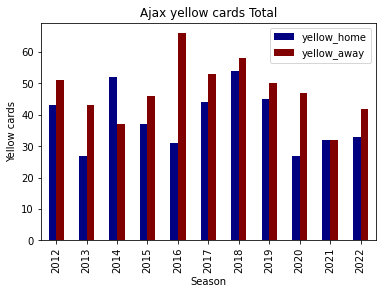

In [476]:
# make new dataframe in order to aggregate
dfAjaxYellowCardTotalEachSeason = pd.DataFrame()
AjaxAwayYellowCards= GroupBySeasenAjaxYellowCardAway['yellowCard_nr']
AjaxHomeYellowCards= GroupBySeasenAjaxYellowCardHome['yellowCard_nr']
dfAjaxYellowCardTotalEachSeason['yellow_home'] = AjaxHomeYellowCards
dfAjaxYellowCardTotalEachSeason["yellow_away"] = AjaxAwayYellowCards

# plot Ajax Goals in each Season Total
dfAjaxYellowCardsTotalEachSeasonPlot = pd.DataFrame(dfAjaxYellowCardTotalEachSeason)
ax = dfAjaxYellowCardsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='Ajax yellow cards Total')
ax.set_xlabel("Season")
ax.set_ylabel("Yellow cards")

<h5>Red cards</h5>

In [477]:
# Ajax red cards Each Season Home
EachSeasonAjaxRedCardHome = dfCards[ (dfCards['home'] == 'ajax-amsterdam') & (dfCards['redCard_nr'] == 1)]
GroupBySeasenAjaxRedCardHome = EachSeasonAjaxRedCardHome.groupby(['saison'])[['redCard_nr']].sum()

In [478]:
# Ajax red cards Each Season Away
EachSeasonAjaxRedCardAway = dfCards[ (dfCards['away'] == 'ajax-amsterdam') & (dfCards['redCard_nr'] == 1)]
GroupBySeasenAjaxRedCardAway = EachSeasonAjaxRedCardAway.groupby(['saison'])[['redCard_nr']].sum()


Text(0, 0.5, 'Red cards')

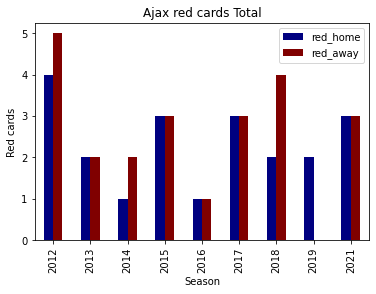

In [479]:
# make new dataframe in order to aggregate
dfAjaxRedCardTotalEachSeason = pd.DataFrame()
AjaxAwayRedCards= GroupBySeasenAjaxRedCardAway['redCard_nr']
AjaxHomeRedCards= GroupBySeasenAjaxRedCardHome['redCard_nr']
dfAjaxRedCardTotalEachSeason['red_home'] = AjaxHomeRedCards
dfAjaxRedCardTotalEachSeason["red_away"] = AjaxAwayRedCards


# plot Ajax Goals in each Season Total
dfAjaxRedCardsTotalEachSeasonPlot = pd.DataFrame(dfAjaxRedCardTotalEachSeason)
ax = dfAjaxRedCardsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='Ajax red cards Total')
ax.set_xlabel("Season")
ax.set_ylabel("Red cards")

##### Cards each season PSV

<h5> Yellow cards </h5>

In [480]:
# PSV Yellow card Each Season Home
EachSeasonPSVYellowCardHome = dfCards[ (dfCards['home'] == 'psv-eindhoven') & (dfCards['yellowCard_nr'] == 1)]
GroupBySeasenPSVYellowCardHome = EachSeasonPSVYellowCardHome.groupby(['saison'])[['yellowCard_nr']].sum()

In [481]:
# PSV Yellow cards Each Season Away
EachSeasonPSVYellowCardAway = dfCards[ (dfCards['away'] == 'psv-eindhoven') & (dfCards['yellowCard_nr'] == 1)]
GroupBySeasenPSVYellowCardAway = EachSeasonPSVYellowCardAway.groupby(['saison'])[['yellowCard_nr']].sum()


Text(0, 0.5, 'Yellow cards')

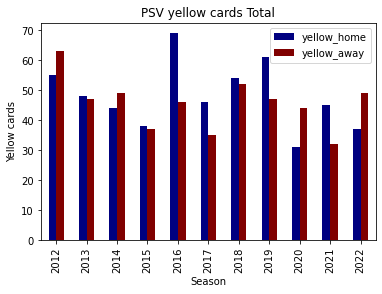

In [482]:
# make new dataframe in order to aggregate
dfPSVYellowCardTotalEachSeason = pd.DataFrame()
PSVAwayYellowCards= GroupBySeasenPSVYellowCardAway['yellowCard_nr']
PSVHomeYellowCards= GroupBySeasenPSVYellowCardHome['yellowCard_nr']
dfPSVYellowCardTotalEachSeason['yellow_home'] = PSVHomeYellowCards
dfPSVYellowCardTotalEachSeason["yellow_away"] = PSVAwayYellowCards


# plot PSV Yellow cards in each Season Total
dfPSVYellowCardsTotalEachSeasonPlot = pd.DataFrame(dfPSVYellowCardTotalEachSeason)
ax = dfPSVYellowCardsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='PSV yellow cards Total')
ax.set_xlabel("Season")
ax.set_ylabel("Yellow cards")

<h5> Red cards </h5>

In [483]:
# PSV red cards Each Season Home
EachSeasonPSVRedCardHome = dfCards[ (dfCards['home'] == 'psv-eindhoven') & (dfCards['redCard_nr'] == 1)]
GroupBySeasenPSVRedCardHome = EachSeasonPSVRedCardHome.groupby(['saison'])[['redCard_nr']].sum()

In [484]:
# PSV red cards Each Season Away
EachSeasonPSVRedCardAway = dfCards[ (dfCards['away'] == 'psv-eindhoven') & (dfCards['redCard_nr'] == 1)]
GroupBySeasenPSVRedCardAway = EachSeasonPSVRedCardAway.groupby(['saison'])[['redCard_nr']].sum()

Text(0, 0.5, 'Red cards')

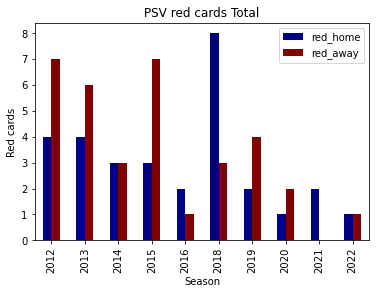

In [485]:
# make new dataframe in order to aggregate
dfPSVRedCardTotalEachSeason = pd.DataFrame()
PSVAwayRedCards= GroupBySeasenPSVRedCardAway['redCard_nr']
PSVHomeRedCards= GroupBySeasenPSVRedCardHome['redCard_nr']
dfPSVRedCardTotalEachSeason['red_home'] = PSVHomeRedCards
dfPSVRedCardTotalEachSeason["red_away"] = PSVAwayRedCards


# plot PSV Yellow cards in each Season Total
dfPSVRedCardsTotalEachSeasonPlot = pd.DataFrame(dfPSVRedCardTotalEachSeason)
ax = dfPSVRedCardsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='PSV red cards Total')
ax.set_xlabel("Season")
ax.set_ylabel("Red cards")

## Matches

In [486]:
Duplicates(raw_matches_file, "match", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_matches_file, "match", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_matches_file, "match", "mvv", "mvv-maastricht")
Duplicates(raw_matches_file, "match", "vitesse", "vitesse-arnhem")
Duplicates(raw_matches_file, "match", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_matches_file, "match", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_matches_file, "match", "go-ahead-eagles_2", "go-ahead-eagles")

# convert the season to int 
raw_matches_file['saison'] = raw_matches_file['saison'].apply(toOneSeason)
raw_matches_file['saison'] = raw_matches_file['saison'].astype(int)

# # filter the last 10 seasons 
filterSeasonMatches = raw_matches_file[(raw_matches_file['saison'] >= 2012) & 
                                        (raw_matches_file['home_score'] != "-") &
                                         (raw_matches_file['away_score'] != "-")]

filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])

# we drop the unneccesary columns 
filtered_matches = filterSeasonMatches.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date','round',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

# drop the empty rows
filtered_matches.dropna()
filtered_matches

C:\Users\malja\AppData\Local\Temp/ipykernel_22644/3111827600.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
C:\Users\malja\AppData\Local\Temp/ipykernel_22644/3111827600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])


,Unnamed: 0,saison,home,away,home_score,away_score
16566,0,2012,ado-den-haag,ajax-amsterdam,0,2
16567,1,2012,ado-den-haag,az-alkmaar,0,6
16568,2,2012,ado-den-haag,de-graafschap,3,5
16569,3,2012,ado-den-haag,fc-groningen,3,0
16570,4,2012,ado-den-haag,fc-twente,1,1
...,...,...,...,...,...,...
19925,301,2022,willem-ii-tilburg,rkc-waalwijk,3,1
19926,302,2022,willem-ii-tilburg,cambuur-leeuwarden,1,3
19927,303,2022,willem-ii-tilburg,sc-heerenveen,0,0
19928,304,2022,willem-ii-tilburg,sparta-rotterdam,0,3


In [487]:
# WinningHomeTeamFilter
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]

WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]

DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]

##### Ajax General Stats

In [488]:
AjaxWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeWin =AjaxWinHome['home_score'].sum()
AwayGoalsLoseAgaintsAjax =AjaxWinHome['away_score'].sum()

                                        

In [489]:
AjaxloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeLose =AjaxloseHome['home_score'].sum()
AwayGoalsWonAgaintsAjax =AjaxloseHome['away_score'].sum()


In [490]:
AjaxDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsDraw =AjaxDrawHome['home_score'].sum()
AwayGoalsDraw =AjaxDrawHome['away_score'].sum()


In [491]:
# Total Ajax Goals Home
totalAjaxGoalsHome = AjaxGoalsHomeWin + AjaxGoalsHomeLose + AjaxGoalsDraw
totalAjaxPointsHome = (len(AjaxWinHome.index) * 3) + len(AjaxDrawHome.index)

In [492]:
AjaxWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayWin = AjaxWinAway['away_score'].sum()
HomeGoalsLoseAgainstAjax = AjaxWinAway['home_score'].sum()                                          

In [493]:
AjaxLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayLose = AjaxLoseAway['away_score'].sum()
HomeGoalsWinAgainstAjax = AjaxLoseAway['home_score'].sum()
         

In [494]:
AjaxDrawAway = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayDraw = AjaxDrawAway['away_score'].sum()
HomeGoalsDrawAgainstAjax = AjaxDrawAway['home_score'].sum()
        

In [495]:
# Total Ajax Goals Away
totalAjaxGoalsAway = AjaxGoalsAwayWin + AjaxGoalsAwayLose + AjaxGoalsAwayDraw

totalAjaxPointsAway = (len(AjaxWinAway.index) * 3) + len(AjaxDrawAway.index)

In [496]:
# Total Ajax Goals, Winnings, losses and draws
TotalAjaxGoals = totalAjaxGoalsHome + totalAjaxGoalsAway
# points
TotalAjaxPoints = totalAjaxPointsHome + totalAjaxPointsAway
# winning
TotalAjaxWinning = len(AjaxWinHome.index) + len(AjaxWinAway.index)
# losses
TotalAjaxLoses = len(AjaxloseHome.index) + len(AjaxLoseAway.index)
# Draws
TotalAjaxDraws = len(AjaxDrawHome.index) + len(AjaxDrawAway.index)

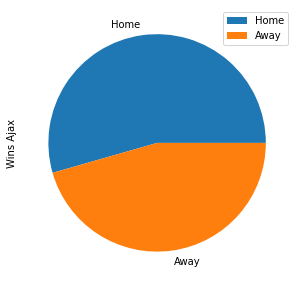

In [497]:
# Plot Ajax Winnings 
piePlotAjaxStatsWinnings = pd.DataFrame({'Wins Ajax': [len(AjaxWinHome.index), len(AjaxWinAway.index)]},
                  index=['Home', 'Away'])
plot = piePlotAjaxStatsWinnings.plot.pie(y='Wins Ajax', figsize=(5, 5))



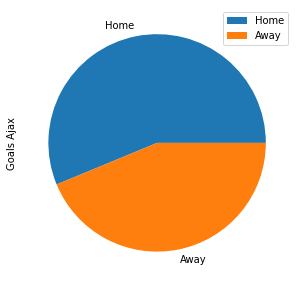

In [498]:
# plot Ajax goals
piePlotAjaxStatsGoals = pd.DataFrame({'Goals Ajax': [totalAjaxGoalsHome, totalAjaxGoalsAway]},
                  index=['Home', 'Away'])
plot = piePlotAjaxStatsGoals.plot.pie(y='Goals Ajax', figsize=(5, 5))

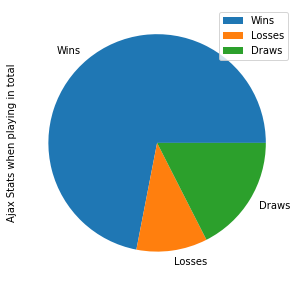

In [499]:
# Plot Ajax stats in total
piePlotAjaxStatsInTotal = pd.DataFrame({'Ajax Stats when playing in total': [TotalAjaxWinning, TotalAjaxLoses, TotalAjaxDraws]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotAjaxStatsInTotal.plot.pie(y='Ajax Stats when playing in total', figsize=(5, 5))

In [500]:
# Ajax Goals Each Season Home
EachSeasonAjaxHome = filtered_matches[ (filtered_matches['home'] == 'ajax-amsterdam')]
GroupBySeasenHome = EachSeasonAjaxHome.groupby(['saison'])[['home_score','away_score']].sum()

In [501]:
# Ajax Goals Each Season Away
EachSeasonAjaxAway = filtered_matches[ (filtered_matches['away'] == 'ajax-amsterdam')]
GroupBySeasenAway = EachSeasonAjaxAway.groupby(['saison'])[['home_score','away_score']].sum()

Text(0, 0.5, 'Goals')

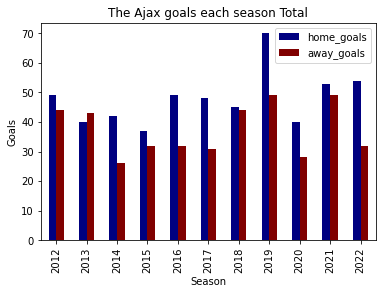

In [502]:
# make new dataframe in order to aggregate
dfAjaxGoalsTotalEachSeason = pd.DataFrame()
AjaxAwayGoals= GroupBySeasenAway['away_score']
AjaxHomeGoals= GroupBySeasenHome['home_score']
dfAjaxGoalsTotalEachSeason['home_goals'] = AjaxHomeGoals
dfAjaxGoalsTotalEachSeason["away_goals"] = AjaxAwayGoals

# plot Ajax Goals in each Season Total
dfAjaxGoalsTotalEachSeasonPlot = pd.DataFrame(dfAjaxGoalsTotalEachSeason)
ax = dfAjaxGoalsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='The Ajax goals each season Total')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

#### Ajax Total Wins

In [503]:
# Ajax Wins Each Season Home
EachSeasonAjaxWinHome = filtered_matches[(filtered_matches['home'] == 'ajax-amsterdam') & (filtered_matches['home_score'] > filtered_matches['away_score'])]
EachSeasonAjaxWinHome.insert(loc=0, column='win', value=1)
GroupBySeasenHomeWinsAjax = EachSeasonAjaxWinHome.groupby(['saison'])[['win']].sum()

In [504]:
# Ajax Wins Each Season Away
EachSeasonAjaxWinAway = filtered_matches[(filtered_matches['away'] == 'ajax-amsterdam') & (filtered_matches['home_score'] < filtered_matches['away_score'])]
EachSeasonAjaxWinAway.insert(loc=0, column='win', value=1)
GroupBySeasonAwayWinsAjax = EachSeasonAjaxWinAway.groupby(['saison'])[['win']].sum()


Text(0, 0.5, 'Wins')

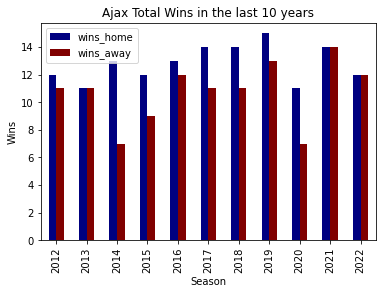

In [505]:
# make new dataframe in order to aggregate
dfAjaxTotalWins = pd.DataFrame()
AjaxHomeWins= GroupBySeasenHomeWinsAjax['win']
AjaxAwayWins= GroupBySeasonAwayWinsAjax['win']
dfAjaxTotalWins['wins_home'] = AjaxHomeWins
dfAjaxTotalWins['wins_away'] = AjaxAwayWins

# plot Ajax Goals in each Season Total
df= pd.DataFrame(dfAjaxTotalWins)
ax = df.plot(lw=2, colormap='jet', kind = 'bar', title='Ajax Total Wins in the last 10 years')
ax.set_xlabel("Season")
ax.set_ylabel("Wins")

##### PSV General Stats

In [506]:
PSVWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeWin =PSVWinHome['home_score'].sum()
AwayGoalsLoseAgaintsPSV =PSVWinHome['away_score'].sum()

In [507]:
PSVloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeLose =PSVloseHome['home_score'].sum()
AwayGoalsWonAgaintsPSV =PSVloseHome['away_score'].sum()

In [508]:
PSVDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsDraw =PSVDrawHome['home_score'].sum()
AwayGoalsDrawPSV =PSVDrawHome['away_score'].sum()


In [509]:
# Total PSV Goals Home
totalPSVGoalsHome = PSVGoalsHomeWin + PSVGoalsHomeLose + PSVGoalsDraw
totalPSVPointsHome = (len(PSVWinHome.index) * 3) + len(PSVDrawHome.index)

In [510]:
PSVWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayWin = PSVWinAway['away_score'].sum()
HomeGoalsLoseAgainstPSV = PSVWinAway['home_score'].sum()

In [511]:
PSVLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayLose = PSVLoseAway['away_score'].sum()
HomeGoalsWinAgainstPSV = PSVLoseAway['home_score'].sum()

In [512]:
PSVDrawAway = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayDraw = PSVDrawAway['away_score'].sum()
HomeGoalsDrawAgainstPSV = PSVDrawAway['home_score'].sum()


In [513]:
# Total PSV Goals Away
totalPSVGoalsAway = PSVGoalsAwayWin + PSVGoalsAwayLose + PSVGoalsAwayDraw
totalPSVPointsAway = (len(PSVWinAway.index) * 3) + len(PSVDrawAway.index)

In [514]:
# Total PSV Goals, Winnings, losses and draws
TotalPSVGoals = totalPSVGoalsAway + totalPSVGoalsHome

# points

TotalPSVPoints = totalPSVPointsAway + totalPSVPointsHome


# winning
TotalPSVWinning = len(PSVWinHome.index) + len(PSVWinAway.index)


# losses
TotalPSVLoses = len(PSVloseHome.index) + len(PSVLoseAway.index)

# Draws
TotalPSVDraws = len(PSVDrawHome.index) + len(PSVDrawAway.index)

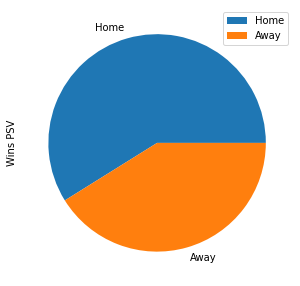

In [515]:
# Plot PSV Winnings 
piePlotPSVStatsWinnings = pd.DataFrame({'Wins PSV': [len(PSVWinHome.index), len(PSVWinAway.index)]},
                  index=['Home', 'Away'])
plot = piePlotPSVStatsWinnings.plot.pie(y='Wins PSV', figsize=(5, 5))



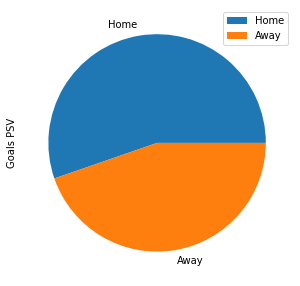

In [516]:
# Plot PSV goals
piePlotPSVStatsGoals = pd.DataFrame({'Goals PSV': [totalPSVGoalsHome, totalPSVGoalsAway]},
                  index=['Home', 'Away'])
plot = piePlotPSVStatsGoals.plot.pie(y='Goals PSV', figsize=(5, 5))

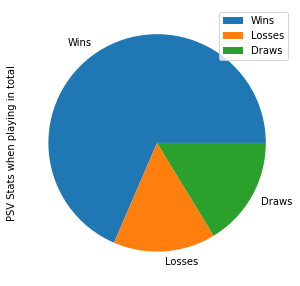

In [517]:
# Plot PSV stats in total
piePlotPSVStatsInTotal = pd.DataFrame({'PSV Stats when playing in total': [TotalPSVWinning, TotalPSVLoses, TotalPSVDraws]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotPSVStatsInTotal.plot.pie(y='PSV Stats when playing in total', figsize=(5, 5))

In [518]:
# PSV Goals Each Season Home
EachSeasonPSV = filtered_matches[ (filtered_matches['home'] == 'psv-eindhoven')]
GroupBySeasenHomePSV = EachSeasonPSV.groupby(['saison'])[['home_score','away_score']].sum()
AwayTeamGoals_Psv= GroupBySeasenHomePSV['away_score']

In [519]:
# PSV Goals Each Season Away
EachSeasonPSVAway = filtered_matches[ (filtered_matches['away'] == 'psv-eindhoven')]
GroupBySeasenAwayPSV = EachSeasonPSVAway.groupby(['saison'])[['home_score','away_score']].sum()
HomeTeamGoals_Psv= GroupBySeasenHomePSV['home_score']

Text(0, 0.5, 'Goals')

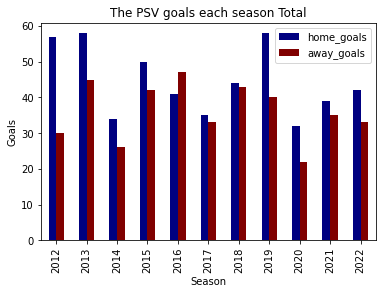

In [520]:
# make new dataframe in order to aggregate
dfPSVGoalsTotalEachSeason = pd.DataFrame()
PSVAwayGoals= GroupBySeasenAwayPSV['away_score']
PSVHomeGoals= GroupBySeasenHomePSV['home_score']
dfPSVGoalsTotalEachSeason['home_goals'] = PSVHomeGoals
dfPSVGoalsTotalEachSeason["away_goals"] = PSVAwayGoals


# plot Ajax Goals in each Season Total
dfPSVGoalsTotalEachSeasonPlot = pd.DataFrame(dfPSVGoalsTotalEachSeason)
ax = dfPSVGoalsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='The PSV goals each season Total')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

#### PSV Wins

In [521]:
# PSV Wins Each Season Home
EachSeasonPSVWinHome = filtered_matches[(filtered_matches['home'] == 'psv-eindhoven') & (filtered_matches['home_score'] > filtered_matches['away_score'])]
EachSeasonPSVWinHome.insert(loc=0, column='win', value=1)
GroupBySeasonHomeWinsPSV = EachSeasonPSVWinHome.groupby(['saison'])[['win']].sum()


In [522]:
# PSV Wins Each Season Away
EachSeasonPSVAway = filtered_matches[(filtered_matches['away'] == 'psv-eindhoven') & (filtered_matches['home_score'] < filtered_matches['away_score'])]
EachSeasonPSVAway.insert(loc=0, column='win', value=1)
GroupBySeasonAwayWinsPSV = EachSeasonPSVAway.groupby(['saison'])[['win']].sum()

Text(0, 0.5, 'Win')

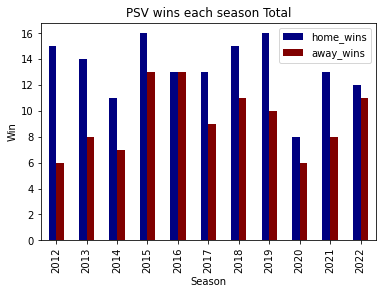

In [523]:
# make new dataframe in order to aggregate
dfPSVTotalWinsEachSeason = pd.DataFrame()
PSVHomeWins= GroupBySeasonHomeWinsPSV['win']
PSVAwayWins= GroupBySeasonAwayWinsPSV['win']
dfPSVTotalWinsEachSeason['home_wins'] = PSVHomeWins
dfPSVTotalWinsEachSeason["away_wins"] = PSVAwayWins

# plot Ajax Goals in each Season Total
df = pd.DataFrame(dfPSVTotalWinsEachSeason)
ax = df.plot(lw=2, colormap='jet', kind = 'bar', title='PSV wins each season Total')
ax.set_xlabel("Season")
ax.set_ylabel("Win")

#### PSV Stadion

In [524]:
PSVWinHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxWin = PSVWinHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVLose = PSVWinHomeAgainstAjax['away_score'].sum()

In [525]:
PSVLoseHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxLose = PSVLoseHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVWin = PSVLoseHomeAgainstAjax['away_score'].sum()


In [526]:
PSVDrawHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxDraw = PSVDrawHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVDraw = PSVDrawHomeAgainstAjax['away_score'].sum()

In [527]:
# total Goals and points in PSV stadion
totalPSVGoalsVsAjaxHome = PSVGoalsHomeAgainstAjaxWin + PSVGoalsHomeAgainstAjaxLose + PSVGoalsHomeAgainstAjaxDraw

totalPSVPointsVsAjaxHome = (len(PSVWinHomeAgainstAjax.index) * 3) + len(PSVDrawHomeAgainstAjax.index)

totalAjaxGoalsVsPSVAway = AjaxGoalsAwayAgainstPSVWin + AjaxGoalsAwayAgainstPSVLose + AjaxGoalsAwayAgainstPSVDraw

totalAjaxPointsVsPSVAway = (len(PSVLoseHomeAgainstAjax.index) * 3) + len(PSVDrawHomeAgainstAjax.index)

<AxesSubplot:title={'center':'PSV vs Ajax (PSV) at PSV Stadion'}>

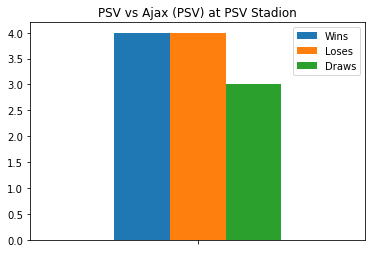

In [528]:
plotdata = pd.DataFrame({
    "Wins": len(PSVWinHomeAgainstAjax.index),
    "Loses": len(PSVLoseHomeAgainstAjax.index),
    "Draws": len(PSVDrawHomeAgainstAjax.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax (PSV) at PSV Stadion")

#### Ajax Stadion

In [529]:
AjaxWinHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVWin = AjaxWinHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxLose = AjaxWinHomeAgainstPSV['away_score'].sum()


In [530]:
AjaxLoseHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVLose = AjaxLoseHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxWin = AjaxLoseHomeAgainstPSV['away_score'].sum()

In [531]:
AjaxDrawHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVDraw = AjaxDrawHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxDraw = AjaxDrawHomeAgainstPSV['away_score'].sum()


In [532]:
# total Goals and points in Ajax stadion
totalAjaxGoalsVsPSVHome = AjaxGoalsHomeAgainstPSVWin + AjaxGoalsHomeAgainstPSVLose + AjaxGoalsHomeAgainstPSVDraw

totalAjaxPointsVsPSVHome = (len(AjaxWinHomeAgainstPSV.index) * 3) + len(AjaxDrawHomeAgainstPSV.index)

totalPSVGoalsVsAjaxAway = PSVGoalsAwayAgainstAjaxWin + PSVGoalsAwayAgainstAjaxLose + PSVGoalsAwayAgainstAjaxDraw

totalPSVPointsVsAjaxAway = (len(AjaxLoseHomeAgainstPSV.index) * 3) + len(AjaxDrawHomeAgainstPSV.index)

<AxesSubplot:title={'center':'PSV vs Ajax (Ajax) at Ajax Stadion'}>

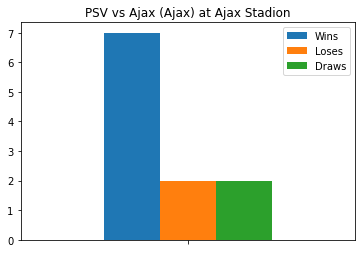

In [533]:
plotdata = pd.DataFrame({
    "Wins": len(AjaxWinHomeAgainstPSV.index),
    "Loses": len(AjaxLoseHomeAgainstPSV.index),
    "Draws": len(AjaxDrawHomeAgainstPSV.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax (Ajax) at Ajax Stadion")

In [534]:
# total goals, points, winnings, losses and draws for each time
# Goals
TotalGoalsAjaxVSPSV = totalAjaxGoalsVsPSVAway + totalAjaxGoalsVsPSVHome 

TotalGoalsPsvVSAjax = totalPSVGoalsVsAjaxHome + totalPSVGoalsVsAjaxAway 

# Points
TotalPointsAjaxVSPSV = totalAjaxPointsVsPSVHome + totalAjaxPointsVsPSVAway

TotalPointsPsvVSAjax = totalPSVPointsVsAjaxHome + totalPSVPointsVsAjaxAway

# Winnings
TotalWinningsAjaxVSPSV = len(PSVLoseHomeAgainstAjax.index) + len(AjaxWinHomeAgainstPSV.index)

TotalWinningsPsvVSAjax = len(AjaxLoseHomeAgainstPSV.index) + len(PSVWinHomeAgainstAjax.index)

# losses
TotalLossesAjaxVSPSV = len(AjaxLoseHomeAgainstPSV.index) + len(PSVWinHomeAgainstAjax.index)

TotalLossesPsvVSAjax = len(PSVLoseHomeAgainstAjax.index) + len(AjaxWinHomeAgainstPSV.index)

# Draws
TotalDrawssAjaxVSPSV = len(AjaxDrawHomeAgainstPSV.index) + len(PSVDrawHomeAgainstAjax.index)

TotalDrawsPsvVSAjax = len(AjaxDrawHomeAgainstPSV.index) + len(PSVDrawHomeAgainstAjax.index)


<AxesSubplot:title={'center':'PSV vs Ajax Goals in total'}>

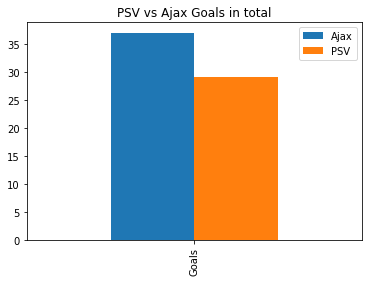

In [535]:
plotdata = pd.DataFrame({
    "Ajax": TotalGoalsAjaxVSPSV,
    "PSV": TotalGoalsPsvVSAjax
    },
    index=['Goals'],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax Goals in total")

<AxesSubplot:title={'center':'PSV vs Ajax Points in total'}>

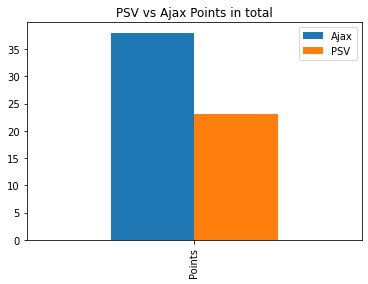

In [536]:
plotdata = pd.DataFrame({
    "Ajax": TotalPointsAjaxVSPSV,
    "PSV": TotalPointsPsvVSAjax
    },
    index=['Points'],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax Points in total")

# Final Result

In [537]:
# the final result Ajax
finalResultAjax = pd.DataFrame()
finalResultAjax['home_goals'] = AjaxHomeGoals
finalResultAjax["away_goals"] = AjaxAwayGoals
finalResultAjax['yellow_home'] = AjaxHomeYellowCards
finalResultAjax["yellow_away"] = AjaxAwayYellowCards
finalResultAjax['red_home'] = AjaxHomeRedCards
finalResultAjax["red_away"] = AjaxAwayRedCards
finalResultAjax["win_home"] = GroupBySeasenHomeWinsAjax
finalResultAjax["win_away"] = GroupBySeasonAwayWinsAjax
finalResultAjax["win_total"] = GroupBySeasonAwayWinsAjax + GroupBySeasenHomeWinsAjax
finalResultAjax['red_home'] = finalResultAjax['red_home'].fillna(0).astype(int)
finalResultAjax['red_away'] = finalResultAjax['red_away'].fillna(0).astype(int)
finalResultAjax

,home_goals,away_goals,yellow_home,yellow_away,red_home,red_away,win_home,win_away,win_total
saison,,,,,,,,,
2012,49,44,43,51,4,5,12,11,23
2013,40,43,27,43,2,2,11,11,22
2014,42,26,52,37,1,2,13,7,20
2015,37,32,37,46,3,3,12,9,21
2016,49,32,31,66,1,1,13,12,25
2017,48,31,44,53,3,3,14,11,25
2018,45,44,54,58,2,4,14,11,25
2019,70,49,45,50,2,0,15,13,28
2020,40,28,27,47,0,0,11,7,18


In [538]:
# the final result PSV   AwayTeamGoals_Psv
finalResultPSV = pd.DataFrame()
finalResultPSV['home_goals'] = PSVHomeGoals
finalResultPSV['enemey_away_goals'] = AwayTeamGoals_Psv
finalResultPSV["away_goals"] = PSVAwayGoals
finalResultPSV["enemey_home_goals"] = HomeTeamGoals_Psv
finalResultPSV['yellow_home'] = PSVHomeYellowCards
finalResultPSV["yellow_away"] = PSVAwayYellowCards
finalResultPSV['red_home'] = PSVHomeRedCards
finalResultPSV["red_away"] = PSVAwayRedCards
finalResultPSV["win_home"] = GroupBySeasonHomeWinsPSV
finalResultPSV["win_away"] = GroupBySeasonAwayWinsPSV
finalResultPSV["win_total"] = GroupBySeasonHomeWinsPSV + GroupBySeasonAwayWinsPSV
finalResultPSV['red_home'] = finalResultPSV['red_home'].fillna(0).astype(int)
finalResultPSV['red_away'] = finalResultPSV['red_away'].fillna(0).astype(int)
finalResultPSV

,home_goals,enemey_away_goals,away_goals,enemey_home_goals,yellow_home,yellow_away,red_home,red_away,win_home,win_away,win_total
saison,,,,,,,,,,,
2012,57,20,30,57,55,63,4,7,15,6,21
2013,58,17,45,58,48,47,4,6,14,8,22
2014,34,18,26,34,44,49,3,3,11,7,18
2015,50,12,42,50,38,37,3,7,16,13,29
2016,41,16,47,41,69,46,2,1,13,13,26
2017,35,9,33,35,46,35,0,1,13,9,22
2018,44,9,43,44,54,52,8,3,15,11,26
2019,58,7,40,58,61,47,2,4,16,10,26
2020,32,12,22,32,31,44,1,2,8,6,14


# Prediction

In [539]:
from sklearn.linear_model import LinearRegression
# X = finalResultPSV[["home_goals", "away_goals", "yellow_home", "yellow_away", "red_home", "red_away"]]
X = finalResultPSV[["away_goals","enemey_home_goals", "yellow_away", "red_away"]]
y = finalResultPSV["win_away"]
reg = LinearRegression().fit(X, y)
acc= reg.score(X, y)
print(acc)
coe = reg.coef_
reg.intercept_
reg.predict([[0, 10 , 14, 2]])

0.6564750806227103


array([2.470158])

In [540]:
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# X = finalResultPSV[["away_goals", "yellow_away", "red_away"]] #features
# y = finalResultPSV["win_total"] #target

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 70% training and 30% test


# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier()

# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print(y_pred)


# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [541]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

ajax_home_team_label = LabelEncoder()
ajax_away_team_label = LabelEncoder()


In [542]:
#Function used for the matches:
def ClassifyMatches(row):
    if(row.home_score > row.away_score):
        return f"{row.home_team} win "
    elif(row.home_score < row.away_score):
        return f"{row.home_team} lose"
    else:
        return f"{row.home_team} draw"

In [543]:
df_MatchesForAjaxHost = pd.DataFrame()
homeTeamAjax = filtered_matches['home'].loc[filtered_matches['home']=='ajax-amsterdam']
awayTeamAjax = filtered_matches['away'].loc[filtered_matches['home'] == 'ajax-amsterdam']
scoresAjaxHome = filtered_matches['home_score'].loc[filtered_matches['home'] == 'ajax-amsterdam']
awayTeamScoresAjax = filtered_matches['away_score'].loc[filtered_matches['home'] == 'ajax-amsterdam']

df_MatchesForAjaxHost['home_team'] = homeTeamAjax
df_MatchesForAjaxHost['away_team'] = awayTeamAjax
df_MatchesForAjaxHost['home_score'] = scoresAjaxHome
df_MatchesForAjaxHost['away_score'] = awayTeamScoresAjax
df_MatchesForAjaxHost['winning_team'] = df_MatchesForAjaxHost.apply(lambda row: ClassifyMatches(row),axis=1)
df_MatchesForAjaxHost["home_team_nr"] = ajax_home_team_label.fit_transform(df_MatchesForAjaxHost['home_team'])
df_MatchesForAjaxHost["away_team_nr"] = ajax_home_team_label.fit_transform(df_MatchesForAjaxHost['away_team'])
df_MatchesForAjaxHost

,home_team,away_team,home_score,away_score,winning_team,home_team_nr,away_team_nr
16583,ajax-amsterdam,ado-den-haag,4,0,ajax-amsterdam win,0,0
16584,ajax-amsterdam,az-alkmaar,2,2,ajax-amsterdam draw,0,1
16585,ajax-amsterdam,de-graafschap,3,1,ajax-amsterdam win,0,3
16586,ajax-amsterdam,fc-groningen,2,0,ajax-amsterdam win,0,6
16587,ajax-amsterdam,fc-twente,1,1,ajax-amsterdam draw,0,7
...,...,...,...,...,...,...,...
19635,ajax-amsterdam,rkc-waalwijk,3,2,ajax-amsterdam win,0,17
19636,ajax-amsterdam,cambuur-leeuwarden,9,0,ajax-amsterdam win,0,2
19638,ajax-amsterdam,sparta-rotterdam,2,1,ajax-amsterdam win,0,21
19639,ajax-amsterdam,vitesse-arnhem,5,0,ajax-amsterdam win,0,22


In [544]:
X = df_MatchesForAjaxHost[["home_team_nr","away_team_nr","home_score"]]
y = df_MatchesForAjaxHost["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [545]:
winning_team_ajax_home = tree.DecisionTreeClassifier()
winning_team_ajax_home.fit(X_train,y_train)

winning_team_ajax_home.score(X_test,y_test)

0.6689655172413793

In [546]:
winning_team_ajax_home.predict([[0,16]])

array(['ajax-amsterdam win '], dtype=object)

<h5> Ajax Away </h5>

In [547]:
df_MatchesForAjaxAway = pd.DataFrame()
awayTeamAjax = filtered_matches['away'].loc[filtered_matches['away']=='ajax-amsterdam']
homeTeam = filtered_matches['home'].loc[filtered_matches['away'] == 'ajax-amsterdam']
scoresAjaxAway = filtered_matches['home_score'].loc[filtered_matches['away'] == 'ajax-amsterdam']
awayTeamScoresAway = filtered_matches['away_score'].loc[filtered_matches['away'] == 'ajax-amsterdam']

df_MatchesForAjaxAway['home_team'] = homeTeam
df_MatchesForAjaxAway['away_team'] = awayTeamAjax
df_MatchesForAjaxAway['home_score'] = scoresAjaxAway
df_MatchesForAjaxAway['away_score'] = awayTeamScoresAway
df_MatchesForAjaxAway['winning_team'] = df_MatchesForAjaxAway.apply(lambda row: ClassifyMatches(row),axis=1)
df_MatchesForAjaxAway["home_team_nr"] = ajax_home_team_label.fit_transform(df_MatchesForAjaxAway['home_team'])
df_MatchesForAjaxAway["away_team_nr"] = ajax_home_team_label.fit_transform(df_MatchesForAjaxAway['away_team'])
df_MatchesForAjaxAway

,home_team,away_team,home_score,away_score,winning_team,home_team_nr,away_team_nr
16566,ado-den-haag,ajax-amsterdam,0,2,ado-den-haag lose,0,0
16601,az-alkmaar,ajax-amsterdam,1,1,az-alkmaar draw,1,0
16618,de-graafschap,ajax-amsterdam,1,4,de-graafschap lose,3,0
16635,fc-groningen,ajax-amsterdam,1,0,fc-groningen win,6,0
16652,fc-twente,ajax-amsterdam,1,2,fc-twente lose,7,0
...,...,...,...,...,...,...,...
19828,rkc-waalwijk,ajax-amsterdam,0,5,rkc-waalwijk lose,17,0
19845,cambuur-leeuwarden,ajax-amsterdam,2,3,cambuur-leeuwarden lose,2,0
19862,sc-heerenveen,ajax-amsterdam,0,2,sc-heerenveen lose,20,0
19879,sparta-rotterdam,ajax-amsterdam,0,1,sparta-rotterdam lose,21,0


In [548]:
X = df_MatchesForAjaxAway[["home_team_nr","away_team_nr","home_score"]]
y = df_MatchesForAjaxAway["winning_team"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [549]:
winning_team_ajax_away = tree.DecisionTreeClassifier()
winning_team_ajax_away.fit(X_train,y_train)

winning_team_ajax_away.score(X_test,y_test)

0.6666666666666666

In [550]:
winning_team_ajax_away.predict([[16 , 0, 5]])

array(['psv-eindhoven win '], dtype=object)

In [551]:
# df_merge = pd.merge(filtered_matches,dfCards,on='saison',how='outer')

# df_cards_matches = pd.DataFrame()
# homeTeam = df_merge["home_x"]
# AwayTeam = df_merge["away_x"]
# home_score = df_merge["home_score"]
# away_score = df_merge["home_score"]

<h4>Cards Prediction</h4>

In [552]:
df_Cards_prediction = pd.DataFrame()
HomeTeam = dfCards['home']
AwayTeam = dfCards['away']
typeCards = dfCards['type']
team_has_card = dfCards['team']

df_Cards_prediction['home_team'] = HomeTeam
df_Cards_prediction['away_team'] = AwayTeam
df_Cards_prediction['type_card'] = typeCards
df_Cards_prediction['team_has_card'] = team_has_card
df_Cards_prediction["home_team_nr"] = ajax_home_team_label.fit_transform(df_Cards_prediction['home_team'])
df_Cards_prediction["away_team_nr"] = ajax_home_team_label.fit_transform(df_Cards_prediction['away_team'])
df_Cards_prediction["type_card"].replace({"red-card": 1, "yellow-card": 0}, inplace=True)
# df_Cards_prediction.loc[df_Cards_prediction['home_team'] == "psv-eindhoven"]

In [553]:
X = df_Cards_prediction[["home_team_nr","away_team_nr","type_card"]]
y = df_Cards_prediction["team_has_card"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [554]:
more_likely_Card = tree.DecisionTreeClassifier()
more_likely_Card.fit(X_train,y_train)

more_likely_Card.score(X_test,y_test)

0.5261820030503305

In [555]:
more_likely_Card.predict([[17 , 1, 0]])

array(['psv-eindhoven'], dtype=object)